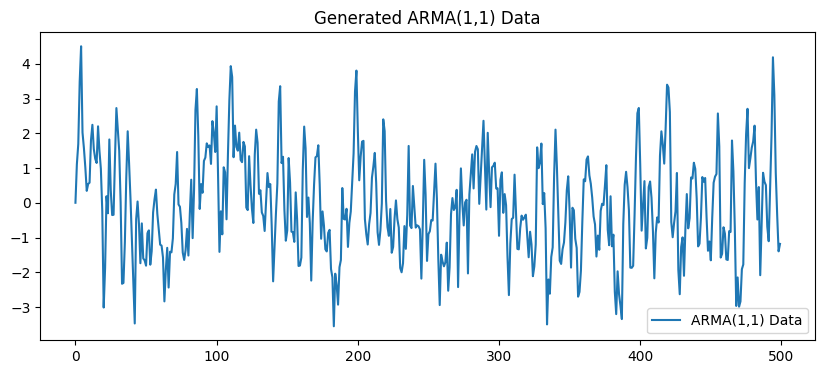

Estimated Parameters: AR: 0.5513717445344265, MA: 0.3392410780128232, Sigma: 0.9950835751308351


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters for the ARMA(1,1) model
np.random.seed(0)
ar_coeff = 0.5
ma_coeff = 0.4
sigma = 1  # Variance of the noise

# Generate test data
def generate_arma_data(n, ar_coeff, ma_coeff, sigma):
    noise = np.random.normal(0, sigma, n)
    data = np.zeros(n)
    for i in range(1, n):
        data[i] = ar_coeff * data[i-1] + ma_coeff * noise[i-1] + noise[i]
    return data

n = 500
data = generate_arma_data(n, ar_coeff, ma_coeff, sigma)

# Plot generated data
plt.figure(figsize=(10, 4))
plt.plot(data, label='ARMA(1,1) Data')
plt.title('Generated ARMA(1,1) Data')
plt.legend()
plt.show()

def arma_log_likelihood(params, data):
    ar, ma, sigma = params
    n = len(data)
    residuals = np.zeros(n)
    noise = np.zeros(n)
    for i in range(1, n):
        noise[i] = data[i] - ar * data[i-1] - ma * noise[i-1]
        residuals[i] = (noise[i] ** 2)
    log_likelihood = np.sum(residuals / (sigma ** 2)) + n * np.log(2 * np.pi * sigma ** 2)
    return 0.5 * log_likelihood

initial_params = [0.1, 0.1, 1] 
result = minimize(arma_log_likelihood, initial_params, args=(data,), method='L-BFGS-B', bounds=[(-1, 1), (-1, 1), (1e-3, None)])
estimated_params = result.x

print(f"Estimated Parameters: AR: {estimated_params[0]}, MA: {estimated_params[1]}, Sigma: {estimated_params[2]}")


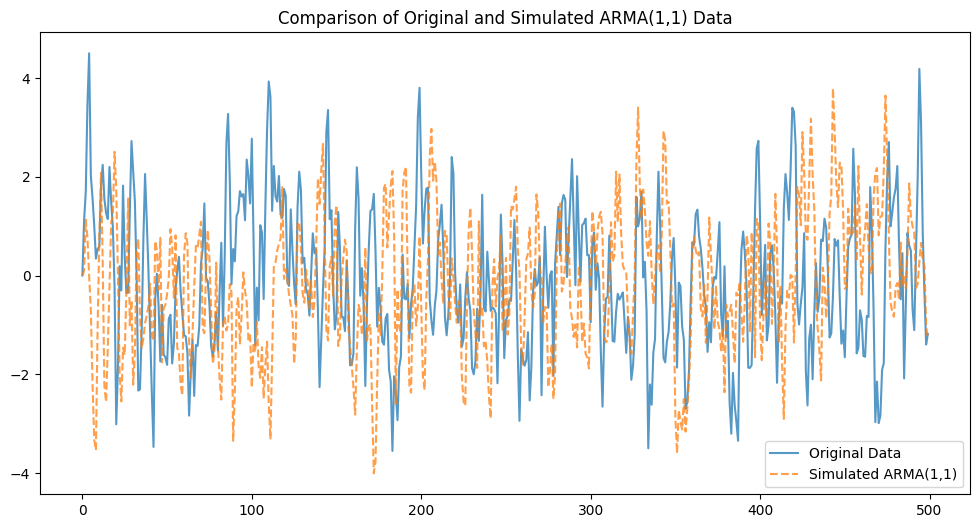

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parameters for the ARMA(1,1) model (assumed from earlier estimation)
ar_coeff = estimated_params[0]
ma_coeff = estimated_params[1]
sigma = estimated_params[2]
n = len(data)  # Use the same number of data points as the original series

# Simulate ARMA data with estimated parameters
def simulate_arma_data(n, ar_coeff, ma_coeff, sigma):
    noise = np.random.normal(0, sigma, n)
    simulated_data = np.zeros(n)
    for i in range(1, n):
        simulated_data[i] = ar_coeff * simulated_data[i-1] + ma_coeff * noise[i-1] + noise[i]
    return simulated_data

simulated_data = simulate_arma_data(n, ar_coeff, ma_coeff, sigma)

# Plot the original and simulated data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', alpha=0.75)
plt.plot(simulated_data, label='Simulated ARMA(1,1)', alpha=0.75, linestyle='--')
plt.title('Comparison of Original and Simulated ARMA(1,1) Data')
plt.legend()
plt.show()


In [14]:
import numpy as np

# Assuming 'data' is your original dataset and 'simulated_data' is the output from your ARMA model
mse = np.mean((data - simulated_data) ** 2)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 4.3636931559432135


In [15]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'data' is your original dataset from the earlier part
# Fit an ARMA model using statsmodels
model = sm.tsa.ARMA(data, order=(1, 1))
fit = model.fit(disp=0)

# Print the fitted parameters from statsmodels
print("Statsmodels ARMA(1,1) Parameters:")
print("AR coefficient:", fit.params[0])
print("MA coefficient:", fit.params[1])
print("Constant (if present):", fit.params[2])

# Simulate data from the statsmodels fitted model
statsmodels_simulated = fit.predict()

# Calculate MSE for the statsmodels simulated data
statsmodels_mse = np.mean((data - statsmodels_simulated) ** 2)

print(f"Statsmodels Mean Squared Error (MSE): {statsmodels_mse}")

# Plot the original data and the statsmodels simulated data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', alpha=0.75)
plt.plot(statsmodels_simulated, label='Statsmodels ARMA(1,1)', alpha=0.75, linestyle='--')
plt.title('Original Data vs. Statsmodels Simulated Data')
plt.legend()
plt.show()


AttributeError: module 'statsmodels.tsa.api' has no attribute 'ARMA'